<a href="https://colab.research.google.com/github/anonymousclan/Assignment-2-/blob/main/Comparative_Study_of_Machine_Learning_Classification_Algorithms_for_Disease_Diagnosis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Comparative Study of Machine Learning Classification Algorithms for Disease Diagnosis

## Step 1 : Define Research Objective
The study aims to compare different Classification Machine Learning Algorithms in a Healthcare sector problem of disease detection.

Importing libraries for data exploration and visualization

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
import warnings
warnings.filterwarnings('ignore')

## Step 2 : Data Collection
This dataset is taken from https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset <br>

It has the following features
- id$\;\;\;$ : $\;\;\;$unique identifier <br>
- gender$\;\;\;$ : $\;\;\;$"Male", "Female" or "Other" <br>
- age$\;\;\;$ : $\;\;\;$age of the patient <br>
- hypertension$\;\;\;$ : $\;\;\;$0 if the patient doesn't have hypertension, 1 if the patient has hypertension <br>
- heart_disease$\;\;\;$ : $\;\;\;$0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease <br>
- ever_married$\;\;\;$ : $\;\;\;$"No" or "Yes" <br>
- work_type$\;\;\;$ : $\;\;\;$"children", "Govt_jov", "Never_worked", "Private" or "Self-employed" <br>
- Residence_type$\;\;\;$ : $\;\;\;$"Rural" or "Urban" <br>
- avg_glucose_level$\;\;\;$ : $\;\;\;$average glucose level in blood <br>
- bmi$\;\;\;$ : $\;\;\;$body mass index <br>
- smoking_status$\;\;\;$ : $\;\;\;$"formerly smoked", "never smoked", "smokes" or "Unknown" <br>
- stroke$\;\;\;$ : $\;\;\;$1 if the patient had a stroke or 0 if not <br>

Importing the dataset

In [ ]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')

FileNotFoundError: ignored

## Step 3 : Exploratory Data Analysis
This step aims to discover, explore, analyze the data and aids to gain insights into the features of the data.

In [ ]:
# Checking the number of rows and columns in the dataset
df.shape

(5110, 12)

In [ ]:
df['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [ ]:
# Displaying the first 5 records
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
# Displaying the columns of the dataset with their data types and counter
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
# Displaying the statistical measures of the numerical features of the dataset
df.describe(include=np.number)

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


Correlation Matrix

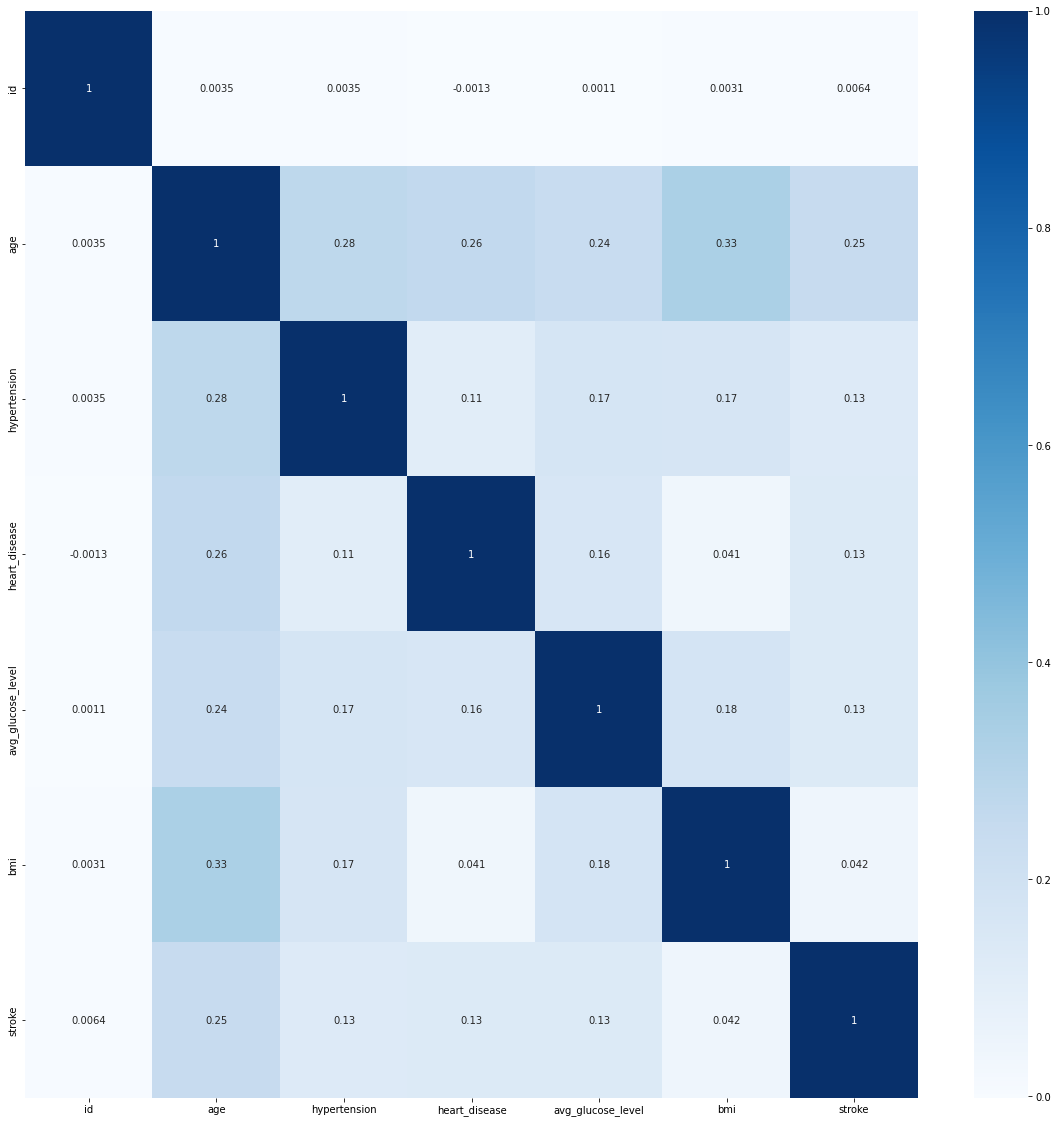

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True, cmap="Blues")

Inference: Independent features are not highly correlated

In [ ]:
# Displaying the statistical measures of the categorical features of the dataset
df.describe(include='O')

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


In [ ]:
# Displaying the data types of the features
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [ ]:
# Checking for NaN values in the dataset
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

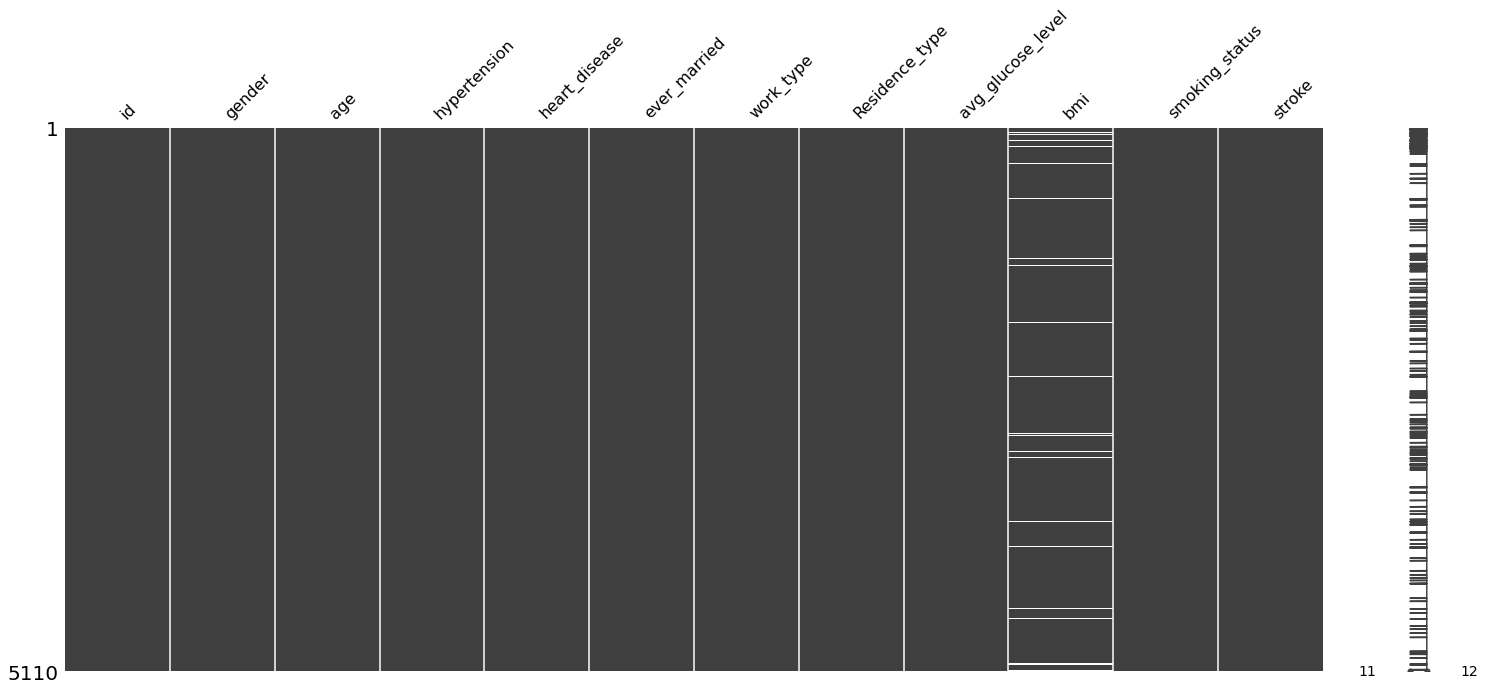

In [ ]:
# Visualize missing values
import missingno as msno
msno.matrix(df)

Inference: There are NaN values in the 'bmi' feature

In [ ]:
# DataFrame with numerical features for EDA
df_num = df.select_dtypes(include=np.number)

In [ ]:
df_num.head()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,9046,67.0,0,1,228.69,36.6,1
1,51676,61.0,0,0,202.21,NaN,1
2,31112,80.0,0,1,105.92,32.5,1
3,60182,49.0,0,0,171.23,34.4,1
4,1665,79.0,1,0,174.12,24.0,1


In [ ]:
# Removing the categorical features
df_num.drop(['id','hypertension','heart_disease','stroke'], axis='columns', inplace=True)

In [ ]:
df_num.head()

,age,avg_glucose_level,bmi
0,67.0,228.69,36.6
1,61.0,202.21,NaN
2,80.0,105.92,32.5
3,49.0,171.23,34.4
4,79.0,174.12,24.0


###### Visualization of the numerical features of the dataset using Distribution Plots

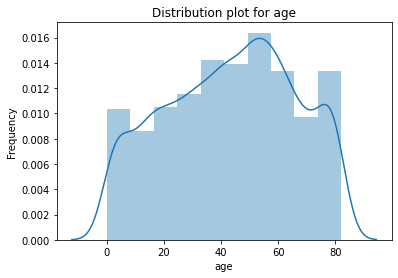

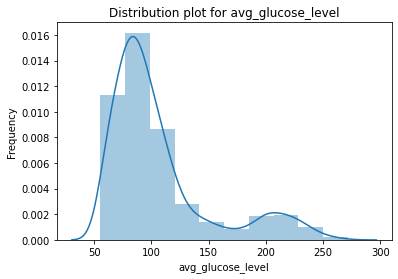

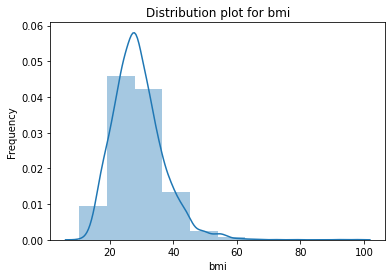

In [ ]:
for cols in df_num.columns:
    distributionplot = sns.distplot(a=df_num[cols], bins=10, hist=True, kde=True)
    plt.xlabel(cols)
    plt.ylabel('Frequency')
    plt.title('Distribution plot for ' + cols)
    plt.show()

In [ ]:
# DataFrame for categorical features
df_cat = df.select_dtypes(include= 'O')

In [ ]:
df_cat=df_cat.join(df['hypertension'])
df_cat=df_cat.join(df['heart_disease'])
df_cat=df_cat.join(df['stroke'])

In [ ]:
df_cat.head()

,gender,ever_married,work_type,Residence_type,smoking_status,hypertension,heart_disease,stroke
0,Male,Yes,Private,Urban,formerly smoked,0,1,1
1,Female,Yes,Self-employed,Rural,never smoked,0,0,1
2,Male,Yes,Private,Rural,never smoked,0,1,1
3,Female,Yes,Private,Urban,smokes,0,0,1
4,Female,Yes,Self-employed,Rural,never smoked,1,0,1


###### Visualization of the categorical features of the dataset using Count Plots

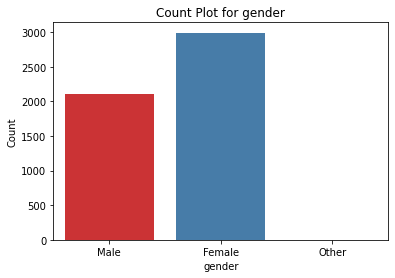

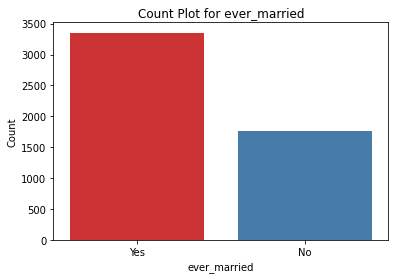

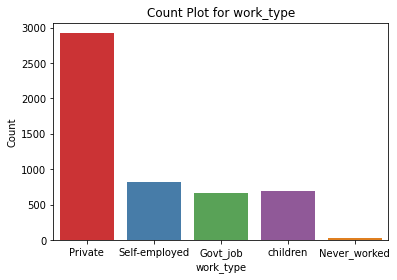

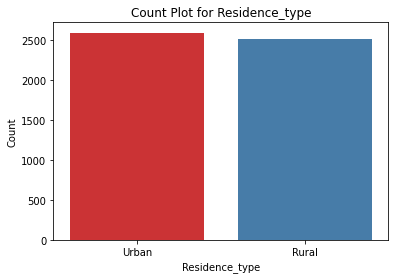

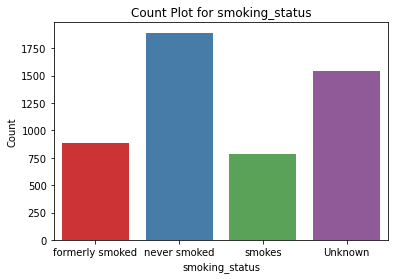

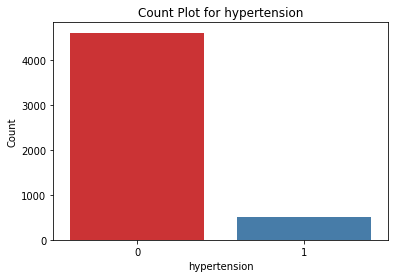

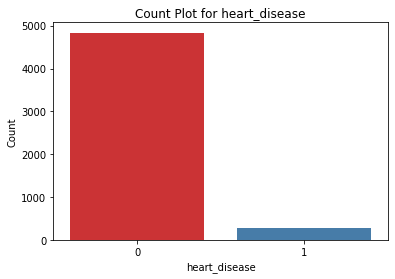

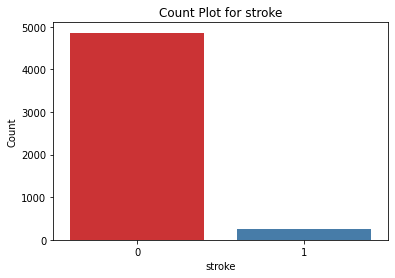

In [ ]:
for cols in df_cat.columns:
    countplots = sns.countplot(x=df_cat[cols], data=df_cat, palette='Set1')
    plt.xlabel(cols)
    plt.ylabel('Count')
    plt.title('Count Plot for ' + cols)
    plt.show()

Inference: The dataset is imbalanced

###### Displaying the cardinality and unique categories of each categroical feature

In [ ]:
for cols in df_cat.columns:
    print("Number of unique categories in df[{}] are {}".format(cols,  df[cols].nunique()))
    print("Unique categories in df[{}] are {}".format(cols, df[cols].unique()))
    print("\n")

Number of unique categories in df[gender] are 3
Unique categories in df[gender] are ['Male' 'Female' 'Other']


Number of unique categories in df[ever_married] are 2
Unique categories in df[ever_married] are ['Yes' 'No']


Number of unique categories in df[work_type] are 5
Unique categories in df[work_type] are ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']


Number of unique categories in df[Residence_type] are 2
Unique categories in df[Residence_type] are ['Urban' 'Rural']


Number of unique categories in df[smoking_status] are 4
Unique categories in df[smoking_status] are ['formerly smoked' 'never smoked' 'smokes' 'Unknown']


Number of unique categories in df[hypertension] are 2
Unique categories in df[hypertension] are [0 1]


Number of unique categories in df[heart_disease] are 2
Unique categories in df[heart_disease] are [1 0]


Number of unique categories in df[stroke] are 2
Unique categories in df[stroke] are [1 0]




###### Separating the dataset into input and target variables

In [ ]:
# Input DataFrame
X=df.iloc[:,1:-1]
X.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked


In [ ]:
# Target DataSeries
Y=df.iloc[:,-1]
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: stroke, dtype: int64

###### Splitting the dataset into training and testing data

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

## Step 4 : Data Preprocessing
This step involves cleaning and processing the raw data before feeding it to the model.

#### Feature Engineering on Training Data

In [ ]:
X_train.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
3029,Female,36.0,0,0,Yes,Private,Rural,67.29,36.7,formerly smoked
2277,Female,34.0,0,0,Yes,Private,Rural,83.53,48.5,formerly smoked
3002,Male,60.0,0,0,Yes,Private,Rural,65.16,30.8,never smoked
246,Female,75.0,0,0,Yes,Self-employed,Rural,78.80,29.3,formerly smoked
2825,Male,76.0,0,0,Yes,Private,Urban,58.65,25.6,smokes


In [ ]:
X_train.shape

(4088, 10)

<br> Checking and imputing NaN values

In [ ]:
for cols in X_train.columns:
    print(" NaN values in " + cols + " = " + str (X_train[cols].isnull().sum()))

 NaN values in gender = 0
 NaN values in age = 0
 NaN values in hypertension = 0
 NaN values in heart_disease = 0
 NaN values in ever_married = 0
 NaN values in work_type = 0
 NaN values in Residence_type = 0
 NaN values in avg_glucose_level = 0
 NaN values in bmi = 160
 NaN values in smoking_status = 0


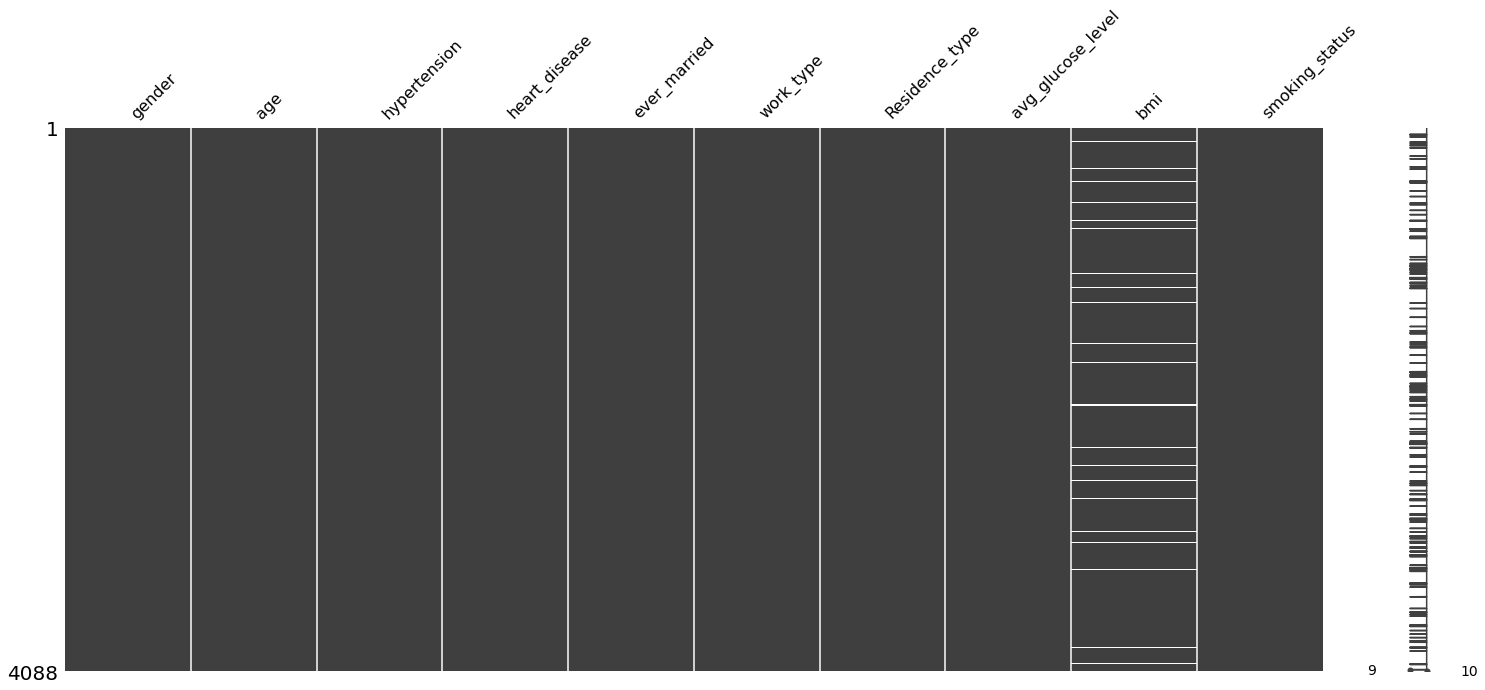

In [ ]:
msno.matrix(X_train)

In [ ]:
median = X_train['bmi'].median()
X_train['bmi'] = X_train['bmi'].replace(np.NaN, median)

In [ ]:
for cols in X_train.columns:
    print(" NaN values in " + cols + " = " + str (X_train[cols].isnull().sum()))

 NaN values in gender = 0
 NaN values in age = 0
 NaN values in hypertension = 0
 NaN values in heart_disease = 0
 NaN values in ever_married = 0
 NaN values in work_type = 0
 NaN values in Residence_type = 0
 NaN values in avg_glucose_level = 0
 NaN values in bmi = 0
 NaN values in smoking_status = 0


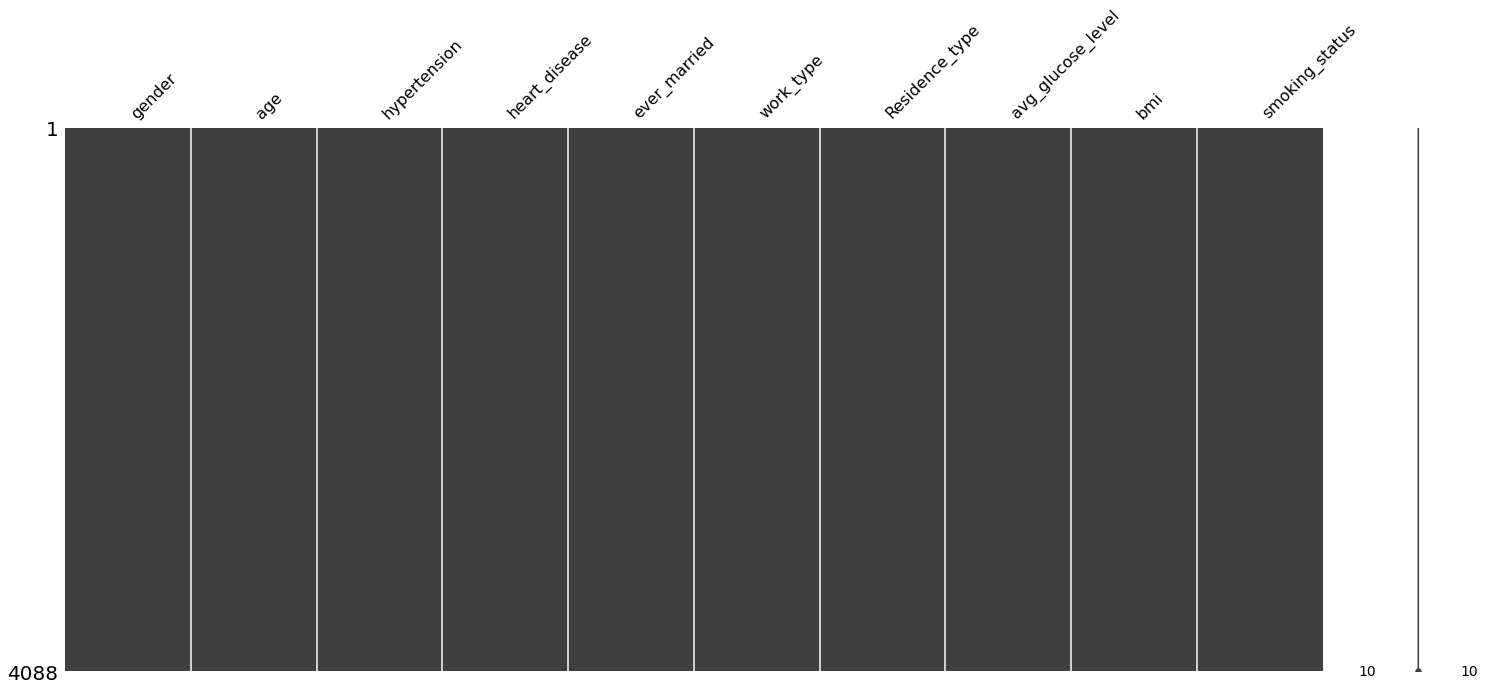

In [ ]:
msno.matrix(X_train)

In [ ]:
# Selecting numerical features
num_features = [features for features in X_train.columns if X_train[features].dtypes != 'O']

In [ ]:
num_features.remove('hypertension')
num_features.remove('heart_disease')

In [ ]:
num_features

['age', 'avg_glucose_level', 'bmi']

In [ ]:
# Selecting categorical features
cat_features = [features for features in X_train.columns if X_train[features].dtypes == 'O']

In [ ]:
cat_features.append('hypertension')
cat_features.append('heart_disease')

In [ ]:
cat_features

['gender',
 'ever_married',
 'work_type',
 'Residence_type',
 'smoking_status',
 'hypertension',
 'heart_disease']

Checking the distribution of the data

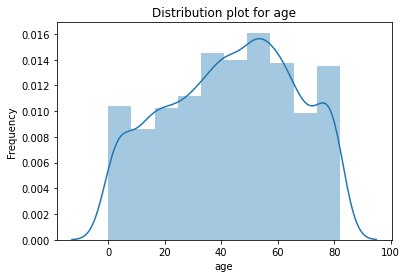

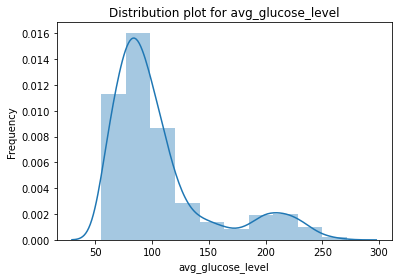

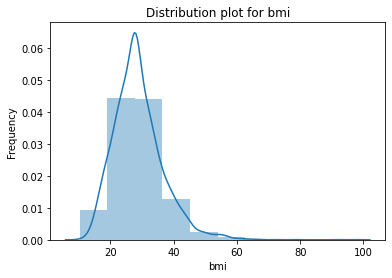

In [ ]:
for cols in num_features:
    distributionplot = sns.distplot(a=X_train[cols], bins=10, hist=True, kde=True)
    plt.xlabel(cols)
    plt.ylabel('Frequency')
    plt.title('Distribution plot for ' + cols)
    plt.show()

###### Detecting outliers using Boxplot and Whisker method

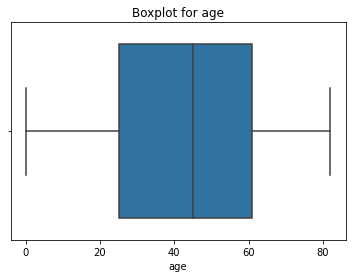

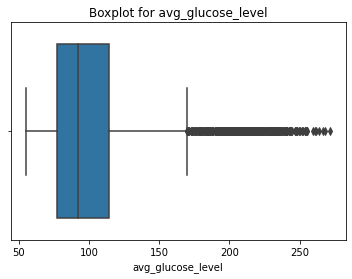

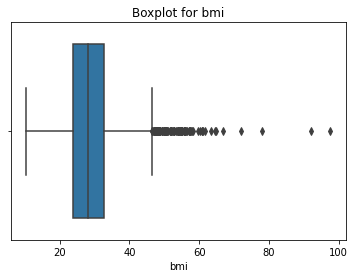

In [ ]:
for cols in num_features:
    bp = sns.boxplot(X_train[cols])
    plt.xlabel(cols)
    plt.title('Boxplot for ' + cols)
    plt.show()

Text(0.5, 1.0, 'Outlier Detection')

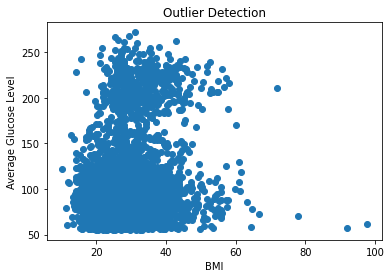

In [ ]:
#Visualizing outliers using Scatter Plot
plt.scatter(X_train['bmi'],X_train['avg_glucose_level'])
plt.xlabel('BMI')
plt.ylabel('Average Glucose Level')
plt.title('Outlier Detection')

###### Handling the outliers using quantile-based Capping and Flooring technique

In [ ]:
upper_limit = X_train['bmi'].quantile(0.99)
lower_limit = X_train['bmi'].quantile(0.01)
X_train['bmi'] = np.where(X_train['bmi'] >= upper_limit, upper_limit,
        np.where(X_train['bmi'] <= lower_limit, lower_limit, X_train['bmi']))

In [ ]:
upper_limit = X_train['avg_glucose_level'].quantile(0.99)
lower_limit = X_train['avg_glucose_level'].quantile(0.01)
X_train['avg_glucose_level'] = np.where(X_train['avg_glucose_level'] >= upper_limit, upper_limit,
        np.where(X_train['avg_glucose_level'] <= lower_limit, lower_limit, X_train['avg_glucose_level']))

Text(0.5, 1.0, 'Scatter Plot after Outlier Handling')

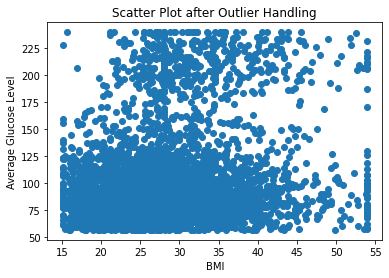

In [ ]:
#Visualization using Scatter Plot after Outlier Handling
plt.scatter(X_train['bmi'],X_train['avg_glucose_level'])
plt.xlabel('BMI')
plt.ylabel('Average Glucose Level')
plt.title('Scatter Plot after Outlier Handling')

###### Encoding the categorical features into numerical features

In [ ]:
X_train[cat_features].head()

,gender,ever_married,work_type,Residence_type,smoking_status,hypertension,heart_disease
3029,Female,Yes,Private,Rural,formerly smoked,0,0
2277,Female,Yes,Private,Rural,formerly smoked,0,0
3002,Male,Yes,Private,Rural,never smoked,0,0
246,Female,Yes,Self-employed,Rural,formerly smoked,0,0
2825,Male,Yes,Private,Urban,smokes,0,0


In [ ]:
from sklearn.preprocessing import LabelEncoder
l1 = LabelEncoder()
l2 = LabelEncoder()
l3 = LabelEncoder()
l4 = LabelEncoder()
l5 = LabelEncoder()

In [ ]:
X_train['gender'] = l1.fit_transform(X_train['gender'])
X_train['ever_married'] = l2.fit_transform(X_train['ever_married'])
X_train['work_type'] = l3.fit_transform(X_train['work_type'])
X_train['Residence_type'] = l4.fit_transform(X_train['Residence_type'])
X_train['smoking_status'] = l5.fit_transform(X_train['smoking_status'])

In [ ]:
l1_name_mapping = dict(zip(l5.classes_, l5.transform(l5.classes_)))
print(l1_name_mapping)

{'Unknown': 0, 'formerly smoked': 1, 'never smoked': 2, 'smokes': 3}


In [ ]:
for cols in cat_features:
    print("Unique features in " + cols + " are " + str(X_train[cols].unique()))

Unique features in gender are [0 1 2]
Unique features in ever_married are [1 0]
Unique features in work_type are [2 3 4 0 1]
Unique features in Residence_type are [0 1]
Unique features in smoking_status are [1 2 3 0]
Unique features in hypertension are [0 1]
Unique features in heart_disease are [0 1]


In [ ]:
X_train.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
3029,0,36.0,0,0,1,2,0,67.29,36.7,1
2277,0,34.0,0,0,1,2,0,83.53,48.5,1
3002,1,60.0,0,0,1,2,0,65.16,30.8,2
246,0,75.0,0,0,1,3,0,78.80,29.3,1
2825,1,76.0,0,0,1,2,1,58.65,25.6,3


#### Feature Engineering on Testing Data

In [ ]:
X_test.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
42,Male,82.0,0,1,Yes,Private,Urban,144.90,26.4,smokes
380,Male,4.0,0,0,No,children,Rural,106.22,16.7,Unknown
3524,Male,58.0,0,0,Yes,Private,Urban,79.95,25.9,never smoked
352,Female,20.0,0,0,No,Private,Rural,96.57,34.1,never smoked
4927,Female,10.0,0,0,No,children,Rural,69.84,13.7,Unknown


In [ ]:
X_test.shape

(1022, 10)

###### <br> Checking and imputing NaN values

In [ ]:
for cols in X_test.columns:
    print(" NaN values in " + cols + " = " + str (X_test[cols].isnull().sum()))

 NaN values in gender = 0
 NaN values in age = 0
 NaN values in hypertension = 0
 NaN values in heart_disease = 0
 NaN values in ever_married = 0
 NaN values in work_type = 0
 NaN values in Residence_type = 0
 NaN values in avg_glucose_level = 0
 NaN values in bmi = 41
 NaN values in smoking_status = 0


In [ ]:
X_test['bmi'] = X_test['bmi'].replace(np.NaN, median)

In [ ]:
for cols in X_test.columns:
    print(" NaN values in " + cols + " = " + str (X_test[cols].isnull().sum()))

 NaN values in gender = 0
 NaN values in age = 0
 NaN values in hypertension = 0
 NaN values in heart_disease = 0
 NaN values in ever_married = 0
 NaN values in work_type = 0
 NaN values in Residence_type = 0
 NaN values in avg_glucose_level = 0
 NaN values in bmi = 0
 NaN values in smoking_status = 0


In [ ]:
# Selecting numerical features
num_features_test = [features for features in X_test.columns if X_test[features].dtypes != 'O']

In [ ]:
num_features_test.remove('hypertension')
num_features_test.remove('heart_disease')

In [ ]:
num_features_test

['age', 'avg_glucose_level', 'bmi']

In [ ]:
# Selecting categorical features
cat_features_test = [features for features in X_test.columns if X_test[features].dtypes == 'O']

In [ ]:
cat_features_test.append('hypertension')
cat_features_test.append('heart_disease')

In [ ]:
cat_features_test

['gender',
 'ever_married',
 'work_type',
 'Residence_type',
 'smoking_status',
 'hypertension',
 'heart_disease']

###### Checking the distribution of the data

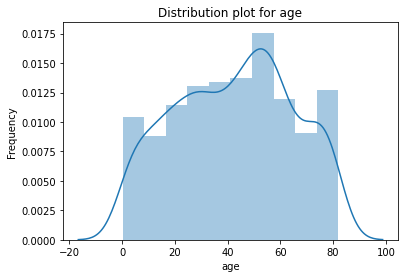

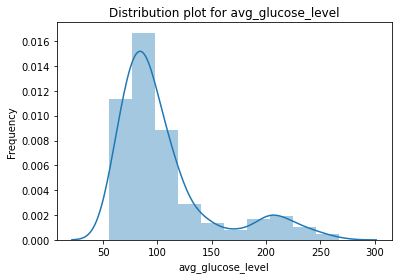

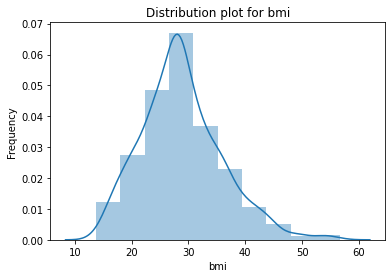

In [ ]:
for cols in num_features_test:
    distributionplot = sns.distplot(a=X_test[cols], bins=10, hist=True, kde=True)
    plt.xlabel(cols)
    plt.ylabel('Frequency')
    plt.title('Distribution plot for ' + cols)
    plt.show()

###### Detecting outliers using Boxplot and Whisker method

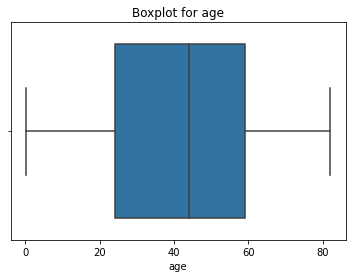

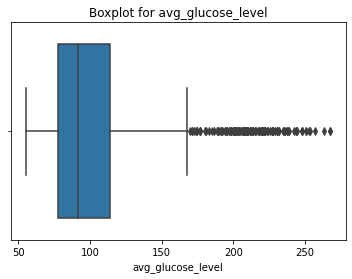

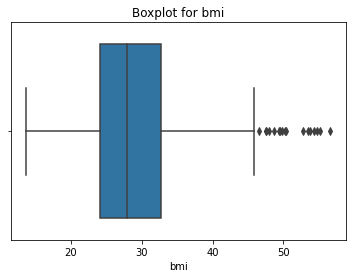

In [ ]:
for cols in num_features_test:
    bp = sns.boxplot(X_test[cols])
    plt.xlabel(cols)
    plt.title('Boxplot for ' + cols)
    plt.show()

###### Handling the outliers using quantile-based Capping and Flooring technique

In [ ]:
upper_limit = X_test['bmi'].quantile(0.99)
lower_limit = X_test['bmi'].quantile(0.01)
X_test['bmi'] = np.where(X_test['bmi'] >= upper_limit, upper_limit,
        np.where(X_test['bmi'] <= lower_limit, lower_limit, X_test['bmi']))

In [ ]:
upper_limit = X_test['avg_glucose_level'].quantile(0.99)
lower_limit = X_test['avg_glucose_level'].quantile(0.01)
X_test['avg_glucose_level'] = np.where(X_test['avg_glucose_level'] >= upper_limit, upper_limit,
        np.where(X_test['avg_glucose_level'] <= lower_limit, lower_limit, X_test['avg_glucose_level']))

###### Encoding the categorical features into numerical features

In [ ]:
X_test[cat_features].head()

,gender,ever_married,work_type,Residence_type,smoking_status,hypertension,heart_disease
42,Male,Yes,Private,Urban,smokes,0,1
380,Male,No,children,Rural,Unknown,0,0
3524,Male,Yes,Private,Urban,never smoked,0,0
352,Female,No,Private,Rural,never smoked,0,0
4927,Female,No,children,Rural,Unknown,0,0


In [ ]:
X_test['gender'] = l1.transform(X_test['gender'])
X_test['ever_married'] = l2.transform(X_test['ever_married'])
X_test['work_type'] = l3.transform(X_test['work_type'])
X_test['Residence_type'] = l4.transform(X_test['Residence_type'])
X_test['smoking_status'] = l5.transform(X_test['smoking_status'])

In [ ]:
for cols in cat_features_test:
    print("Unique features in " + cols + " are " + str(X_test[cols].unique()))

Unique features in gender are [1 0]
Unique features in ever_married are [1 0]
Unique features in work_type are [2 4 0 3 1]
Unique features in Residence_type are [1 0]
Unique features in smoking_status are [3 0 2 1]
Unique features in hypertension are [0 1]
Unique features in heart_disease are [1 0]


In [ ]:
X_test.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
42,1,82.0,0,1,1,2,1,144.90,26.400,3
380,1,4.0,0,0,0,4,0,106.22,16.700,0
3524,1,58.0,0,0,1,2,1,79.95,25.900,2
352,0,20.0,0,0,0,2,0,96.57,34.100,2
4927,0,10.0,0,0,0,4,0,69.84,15.621,0


## Step 5 : Feature Selection
This step involves the selection of critical features while dropping the unnecessary features that contribute to the output variable.

In [ ]:
plt.figure(figsize=(15,12))
sns.heatmap(X_train.corr(), annot=True, cmap="inferno")

NameError: ignored

In [ ]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i,j])>threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [ ]:
corr_features = correlation(X_train, 0.85)

In [ ]:
corr_features

Inference: The independent features are not highly correlated, hence no feature should be dropped

In [ ]:
# Feature Selection based on importance of the features
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier(n_estimators=10)
model.fit(X_train, Y_train)
feature_imp = model.feature_importances_

In [ ]:
feature_imp = feature_imp*100

In [ ]:
# Visualizing the importance of input features
plt.figure(figsize=(18,13))
sns.set(font_scale = 1.1)
sns.set_style('whitegrid')
barplot_feature_imp = sns.barplot(X_train.columns, feature_imp ,color='thistle')

barplot_feature_imp.set_xlabel('Features')
barplot_feature_imp.set_ylabel('Feature Importance')
barplot_feature_imp.set_title('Bar Plot for visualizing Feature Importance')

for p in barplot_feature_imp.patches:
    barplot_feature_imp.annotate("{:.2f}%".format(p.get_height()), (p.get_x() + 0.25, p.get_height() + 0.01))

Inference: Every independent feature contributes to the target feature. 'age' is the most important feature while 'ever_married' contributes least to the target variable

##### Handling the imbalanced dataset
Applying the SMOTE technique to handle the unbalanced dataset

In [ ]:
from collections import Counter
print('Original dataset target feature category counter {}'.format(Counter(Y_train)))

In [ ]:
cp=sns.countplot(Y_train, palette="Set1")
plt.title("Count Plot for Stroke before applying SMOTE")

Y_train.value_counts()

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
X_train, Y_train = sm.fit_resample(X_train,Y_train)
print('Resampled dataset target feature category counter {}'.format(Counter(Y_train)))

In [ ]:
cp=sns.countplot(Y_train, palette="Set1")
plt.title("Count Plot for Stroke after applying SMOTE")

Y_train.value_counts()

## Step 6 : Model Building and Evaluation
In this study, several Classification Machine Learning Models are trained using the training dataset. Then, the model is used for prediction using the the testing dataset. Further, the model is evaluated using various evaluation metrics from classification like Confusion Matrix.

### 1. Decision Tree Classifier

In [ ]:
from sklearn import tree
model_decision_tree = tree.DecisionTreeClassifier()

model_decision_tree.fit(X_train,Y_train)

Y_pred_train_decision_tree = model_decision_tree.predict(X_train)
Y_pred_test_decision_tree = model_decision_tree.predict(X_test)
Y_proba_test_decision_tree = model_decision_tree.predict_proba(X_test)

[Text(0.41116861836021723, 0.98, 'X[1] <= 52.013\ngini = 0.5\nsamples = 7786\nvalue = [3893, 3893]'),
 Text(0.08385227530640037, 0.94, 'X[1] <= 38.001\ngini = 0.21\nsamples = 2835\nvalue = [2497, 338]'),
 Text(0.011802088061733999, 0.9, 'X[1] <= 32.052\ngini = 0.024\nsamples = 1680\nvalue = [1660, 20]'),
 Text(0.003631411711302769, 0.86, 'X[1] <= 31.5\ngini = 0.001\nsamples = 1354\nvalue = [1353, 1]'),
 Text(0.0018157058556513845, 0.82, 'gini = 0.0\nsamples = 1296\nvalue = [1296, 0]'),
 Text(0.005447117566954153, 0.82, 'X[7] <= 76.645\ngini = 0.034\nsamples = 58\nvalue = [57, 1]'),
 Text(0.003631411711302769, 0.78, 'X[7] <= 75.28\ngini = 0.117\nsamples = 16\nvalue = [15, 1]'),
 Text(0.0018157058556513845, 0.74, 'gini = 0.0\nsamples = 15\nvalue = [15, 0]'),
 Text(0.005447117566954153, 0.74, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.007262823422605538, 0.78, 'gini = 0.0\nsamples = 42\nvalue = [42, 0]'),
 Text(0.01997276441216523, 0.86, 'X[1] <= 32.999\ngini = 0.11\nsamples = 32

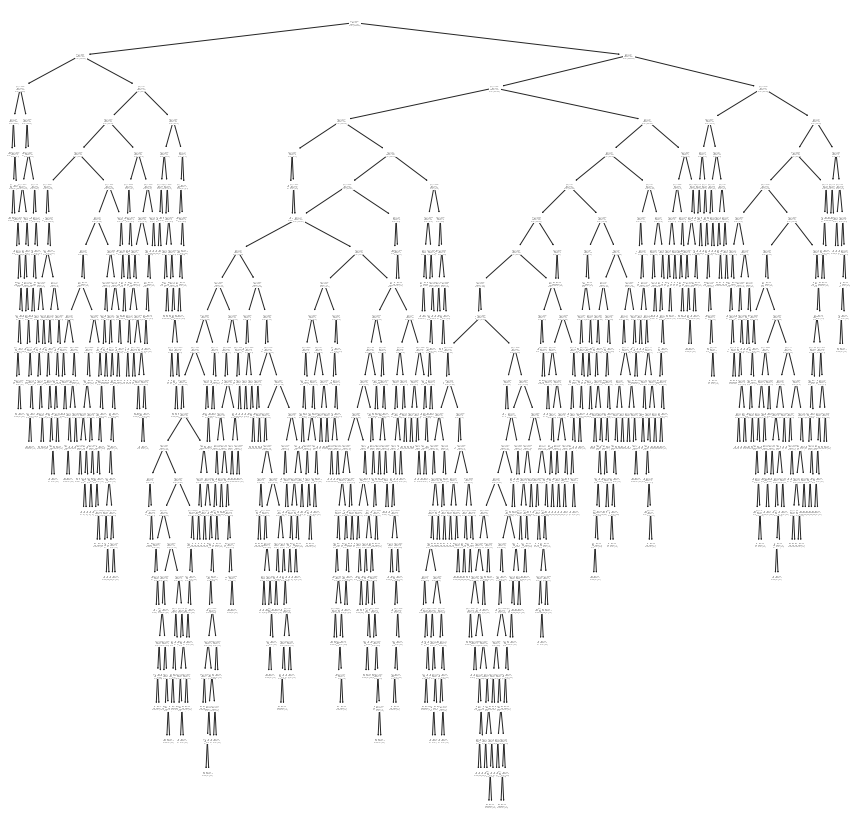

In [ ]:
plt.figure(figsize=(15,15))
tree.plot_tree(model_decision_tree) #descision tree is the best concept ever that i understand

###### Evaluating the Decision Tree Classifier model

Train accuracy: 1.0
Test accuracy: 0.8864970645792564
Recall Score: 0.2962962962962963
ROC AUC Score: 0.607858891949801

Classification Report:

              precision    recall  f1-score   support

           0       0.96      0.92      0.94       968
           1       0.17      0.30      0.22        54

    accuracy                           0.89      1022
   macro avg       0.56      0.61      0.58      1022
weighted avg       0.92      0.89      0.90      1022


Confusion Matrix:



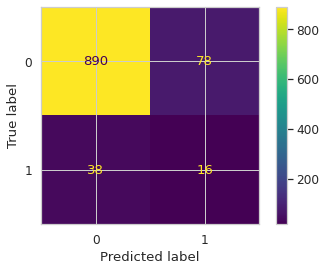

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, fbeta_score, roc_auc_score, roc_curve, RocCurveDisplay, plot_confusion_matrix

print('Train accuracy: ' + str(accuracy_score(Y_train, Y_pred_train_decision_tree)))
print('Test accuracy: ' + str(accuracy_score(Y_test, Y_pred_test_decision_tree)))
print('Recall Score: ' + str(recall_score(Y_test, Y_pred_test_decision_tree)))
print('ROC AUC Score: ' + str(roc_auc_score(Y_test, Y_proba_test_decision_tree[:,1])))

print('\nClassification Report:\n')
print(classification_report(Y_test, Y_pred_test_decision_tree))
print('\nConfusion Matrix:\n')
plot_confusion_matrix(model_decision_tree,X_test, Y_test)

###### ROC curve for Decision Tree Classifier model

Text(0.5, 1.0, 'ROC curve for Decision Tree')

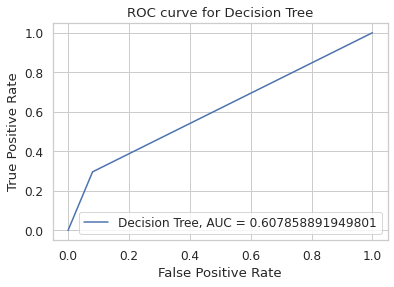

In [ ]:
fpr_decision_tree, tpr_decision_tree, _ = roc_curve(Y_test, Y_proba_test_decision_tree[:,1])
plt.plot(fpr_decision_tree, tpr_decision_tree, label="Decision Tree, AUC = " + str(roc_auc_score(Y_test, Y_pred_test_decision_tree)))
plt.legend(loc = 'lower right')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for Decision Tree')

### 2. Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
model_naive_bayes = GaussianNB()

model_naive_bayes.fit(X_train,Y_train)

Y_pred_train_naive_bayes = model_naive_bayes.predict(X_train)
Y_pred_test_naive_bayes = model_naive_bayes.predict(X_test)
Y_proba_test_naive_bayes = model_naive_bayes.predict_proba(X_test)

###### Evaluating the Gaussian Naive Bayes model

Train accuracy: 0.7951451322887233
Test accuracy: 0.7475538160469667
Recall Score: 0.5740740740740741
ROC AUC Score: 0.7451981940618303

Classification Report:

              precision    recall  f1-score   support

           0       0.97      0.76      0.85       968
           1       0.12      0.57      0.19        54

    accuracy                           0.75      1022
   macro avg       0.54      0.67      0.52      1022
weighted avg       0.92      0.75      0.82      1022


Confusion Matrix:



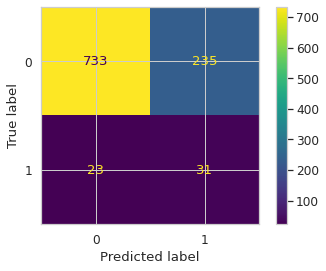

In [ ]:
print('Train accuracy: ' + str(accuracy_score(Y_train, Y_pred_train_naive_bayes)))
print('Test accuracy: ' + str(accuracy_score(Y_test, Y_pred_test_naive_bayes)))
print('Recall Score: ' + str(recall_score(Y_test, Y_pred_test_naive_bayes)))
print('ROC AUC Score: ' + str(roc_auc_score(Y_test, Y_proba_test_naive_bayes[:,1])))

print('\nClassification Report:\n')
print(classification_report(Y_test, Y_pred_test_naive_bayes))
print('\nConfusion Matrix:\n')
plot_confusion_matrix(model_naive_bayes,X_test, Y_test)

###### ROC curve for Gaussian Naive Bayes

Text(0.5, 1.0, 'ROC curve for Naive Bayes')

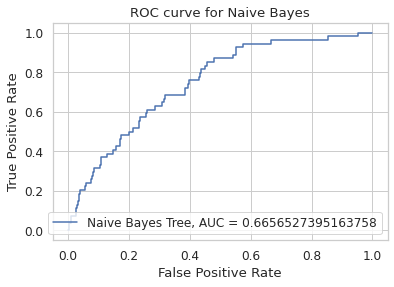

In [ ]:
fpr_naive_bayes, tpr_naive_bayes, _ = roc_curve(Y_test, Y_proba_test_naive_bayes[:,1])
plt.plot(fpr_naive_bayes, tpr_naive_bayes, label="Naive Bayes Tree, AUC = " + str(roc_auc_score(Y_test, Y_pred_test_naive_bayes)))
plt.legend(loc = 'lower right')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for Naive Bayes')

### 3. Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model_random_forest = RandomForestClassifier(n_estimators=20,random_state=0)

model_random_forest.fit(X_train,Y_train)

Y_pred_train_random_forest = model_random_forest.predict(X_train)
Y_pred_test_random_forest = model_random_forest.predict(X_test)
Y_proba_test_random_forest = model_random_forest.predict_proba(X_test)

###### Evaluating the Random Forest Classifier model

Train accuracy: 0.99948625738505
Test accuracy: 0.8904109589041096
Recall Score: 0.1111111111111111
ROC AUC Score: 0.737756351392715

Classification Report:

              precision    recall  f1-score   support

           0       0.95      0.93      0.94       968
           1       0.09      0.11      0.10        54

    accuracy                           0.89      1022
   macro avg       0.52      0.52      0.52      1022
weighted avg       0.90      0.89      0.90      1022


Confusion Matrix:



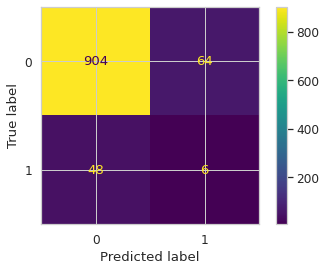

In [ ]:
print('Train accuracy: ' + str(accuracy_score(Y_train, Y_pred_train_random_forest)))
print('Test accuracy: ' + str(accuracy_score(Y_test, Y_pred_test_random_forest)))
print('Recall Score: ' + str(recall_score(Y_test, Y_pred_test_random_forest)))
print('ROC AUC Score: ' + str(roc_auc_score(Y_test, Y_proba_test_random_forest[:,1])))

print('\nClassification Report:\n')
print(classification_report(Y_test, Y_pred_test_random_forest))
print('\nConfusion Matrix:\n')
plot_confusion_matrix(model_random_forest,X_test, Y_test)

###### ROC curve for Random Forest Classifier

Text(0.5, 1.0, 'ROC curve for Random Forest')

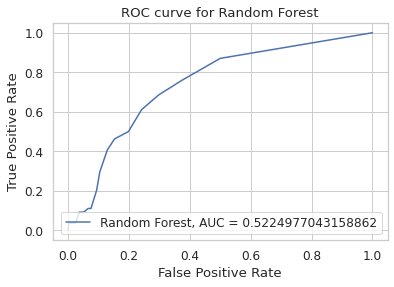

In [ ]:
fpr_random_forest, tpr_random_forest, _ = roc_curve(Y_test, Y_proba_test_random_forest[:,1])
plt.plot(fpr_random_forest, tpr_random_forest, label="Random Forest, AUC = " + str(roc_auc_score(Y_test, Y_pred_test_random_forest)))
plt.legend(loc = 'lower right')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for Random Forest')

### 4. AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
model_adaboost = AdaBoostClassifier(n_estimators=100, base_estimator= None,learning_rate=1, random_state = 1)

model_adaboost.fit(X_train,Y_train)

Y_pred_train_adaboost = model_adaboost.predict(X_train)
Y_pred_test_adaboost = model_adaboost.predict(X_test)
Y_proba_test_adaboost = model_adaboost.predict_proba(X_test)

###### Evaluating the AdaBoost model

Train accuracy: 0.8548677112766504
Test accuracy: 0.7984344422700587
Recall Score: 0.4444444444444444
ROC AUC Score: 0.7409894398530762

Classification Report:

              precision    recall  f1-score   support

           0       0.96      0.82      0.88       968
           1       0.12      0.44      0.19        54

    accuracy                           0.80      1022
   macro avg       0.54      0.63      0.54      1022
weighted avg       0.92      0.80      0.85      1022


Confusion Matrix:



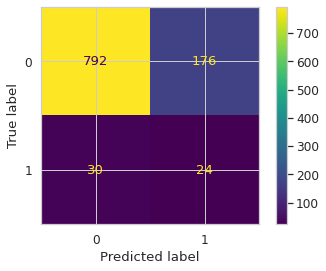

In [ ]:
print('Train accuracy: ' + str(accuracy_score(Y_train, Y_pred_train_adaboost)))
print('Test accuracy: ' + str(accuracy_score(Y_test, Y_pred_test_adaboost)))
print('Recall Score: ' + str(recall_score(Y_test, Y_pred_test_adaboost)))
print('ROC AUC Score: ' + str(roc_auc_score(Y_test, Y_proba_test_adaboost[:,1])))

print('\nClassification Report:\n')
print(classification_report(Y_test, Y_pred_test_adaboost))
print('\nConfusion Matrix:\n')
plot_confusion_matrix(model_adaboost,X_test, Y_test)

###### ROC curve for AdaBoost model

Text(0.5, 1.0, 'ROC curve for Ada Boost')

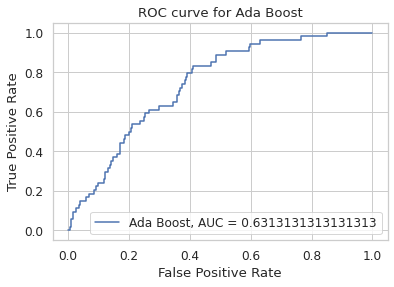

In [ ]:
fpr_adaboost, tpr_adaboost, _ = roc_curve(Y_test, Y_proba_test_adaboost[:,1])
plt.plot(fpr_adaboost, tpr_adaboost, label="Ada Boost, AUC = " + str(roc_auc_score(Y_test, Y_pred_test_adaboost)))
plt.legend(loc = 'lower right')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for Ada Boost')

### 5. XGBoost

In [ ]:
import xgboost as xgb
model_xgboost = xgb.XGBClassifier(learning_rate=0.1, n_estimators=500)

model_xgboost.fit(X_train,Y_train)

Y_pred_train_xgboost = model_xgboost.predict(X_train)
Y_pred_test_xgboost = model_xgboost.predict(X_test)
Y_proba_test_xgboost = model_xgboost.predict_proba(X_test)

###### Evaluating the XGBoost model

Train accuracy: 0.965322373490881
Test accuracy: 0.9001956947162426
Recall Score: 0.18518518518518517
ROC AUC Score: 0.7313666972757882

Classification Report:

              precision    recall  f1-score   support

           0       0.95      0.94      0.95       968
           1       0.15      0.19      0.16        54

    accuracy                           0.90      1022
   macro avg       0.55      0.56      0.56      1022
weighted avg       0.91      0.90      0.91      1022


Confusion Matrix:



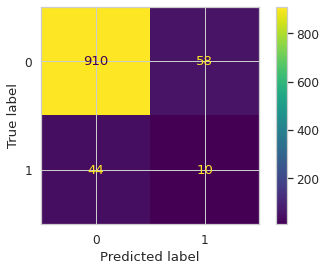

In [ ]:
print('Train accuracy: ' + str(accuracy_score(Y_train, Y_pred_train_xgboost)))
print('Test accuracy: ' + str(accuracy_score(Y_test, Y_pred_test_xgboost)))
print('Recall Score: ' + str(recall_score(Y_test, Y_pred_test_xgboost)))
print('ROC AUC Score: ' + str(roc_auc_score(Y_test, Y_proba_test_xgboost[:,1])))

print('\nClassification Report:\n')
print(classification_report(Y_test, Y_pred_test_xgboost))
print('\nConfusion Matrix:\n')
plot_confusion_matrix(model_xgboost,X_test, Y_test)

###### ROC curve for XGBoost model

Text(0.5, 1.0, 'ROC curve for XGBoost')

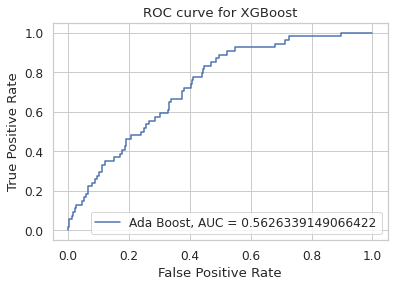

In [ ]:
fpr_xgboost, tpr_xgboost, _ = roc_curve(Y_test, Y_proba_test_xgboost[:,1])
plt.plot(fpr_xgboost, tpr_xgboost, label="Ada Boost, AUC = " + str(roc_auc_score(Y_test, Y_pred_test_xgboost)))
plt.legend(loc = 'lower right')
plt.legend(loc = 'lower right')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for XGBoost')

###### Feature Scaling (standardizing the features)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(X_train)
scaler.transform(X_test)

array([[ 1.43378203,  1.2088606 , -0.28738784, ...,  0.5229535 ,
        -0.43520606,  1.81740571],
       [ 1.43378203, -2.33669632, -0.28738784, ..., -0.20185777,
        -1.94411854, -1.31227304],
       [ 1.43378203,  0.11792001, -0.28738784, ..., -0.6941223 ,
        -0.51298505,  0.77417946],
       ...,
       [ 1.43378203, -0.15481514, -0.28738784, ..., -0.89237729,
         1.08926223, -1.31227304],
       [ 1.43378203,  1.02703717, -0.28738784, ...,  2.26283783,
        -0.18631328, -0.26904679],
       [-0.69664295, -0.92756473, -0.28738784, ..., -0.63190996,
        -1.46188878, -0.26904679]])

### 6. Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
model_logistic=LogisticRegression()

model_logistic.fit(X_train,Y_train)

Y_pred_train_logistic=model_logistic.predict(X_train)
Y_pred_test_logistic=model_logistic.predict(X_test)
Y_proba_test_logistic = model_logistic.predict_proba(X_test)

###### Evaluating the Logistic Regression model

Train accuracy: 0.7929617261751862
Test accuracy: 0.7671232876712328
Recall Score: 0.5370370370370371
F2-Score: 0.3165938864628821
ROC AUC Score: 0.7412572696663605

Classification Report:

              precision    recall  f1-score   support

           0       0.97      0.78      0.86       968
           1       0.12      0.54      0.20        54

    accuracy                           0.77      1022
   macro avg       0.54      0.66      0.53      1022
weighted avg       0.92      0.77      0.83      1022


Confusion Matrix:



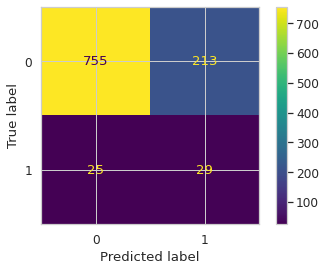

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, fbeta_score, roc_auc_score, roc_curve, RocCurveDisplay, plot_confusion_matrix

print('Train accuracy: ' + str(accuracy_score(Y_train, Y_pred_train_logistic)))
print('Test accuracy: ' + str(accuracy_score(Y_test, Y_pred_test_logistic)))
print('Recall Score: ' + str(recall_score(Y_test, Y_pred_test_logistic)))
print('F2-Score: ' + str(fbeta_score(Y_test, Y_pred_test_logistic, beta=2)))
print('ROC AUC Score: ' + str(roc_auc_score(Y_test, Y_proba_test_logistic[:,1])))

print('\nClassification Report:\n')
print(classification_report(Y_test, Y_pred_test_logistic))

print('\nConfusion Matrix:\n')
plot_confusion_matrix(model_logistic,X_test, Y_test)

###### ROC curve for Logistic Regression model

Text(0.5, 1.0, 'ROC curve for Logistic Regression')

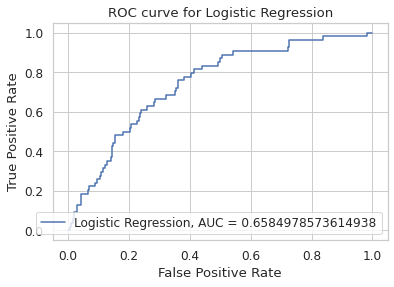

In [ ]:
fpr_logistic, tpr_logistic, _ = roc_curve(Y_test, Y_proba_test_logistic[:,1])
plt.plot(fpr_logistic, tpr_logistic, label="Logistic Regression, AUC = " + str(roc_auc_score(Y_test, Y_pred_test_logistic)))
plt.legend(loc = 'lower right')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for Logistic Regression')

### 7. K Nearest Neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors=2)

model_knn.fit(X_train,Y_train)

Y_pred_train_knn=model_knn.predict(X_train)
Y_pred_test_knn=model_knn.predict(X_test)
Y_proba_test_knn = model_knn.predict_proba(X_test)

###### Evaluating the K Nearest Neighbor model

Train accuracy: 0.9929360390444387
Test accuracy: 0.8806262230919765
Recall Score: 0.2777777777777778
F2-Score: 0.2388535031847134
ROC AUC Score: 0.6508264462809917

Classification Report:

              precision    recall  f1-score   support

           0       0.96      0.91      0.94       968
           1       0.15      0.28      0.20        54

    accuracy                           0.88      1022
   macro avg       0.56      0.60      0.57      1022
weighted avg       0.92      0.88      0.90      1022


Confusion Matrix:



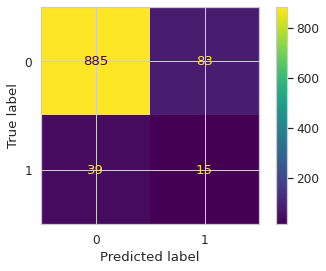

In [ ]:
print('Train accuracy: ' + str(accuracy_score(Y_train, Y_pred_train_knn)))
print('Test accuracy: ' + str(accuracy_score(Y_test, Y_pred_test_knn)))
print('Recall Score: ' + str(recall_score(Y_test, Y_pred_test_knn)))
print('F2-Score: ' + str(fbeta_score(Y_test, Y_pred_test_knn,beta=2)))
print('ROC AUC Score: ' + str(roc_auc_score(Y_test, Y_proba_test_knn[:,1])))

print('\nClassification Report:\n')
print(classification_report(Y_test, Y_pred_test_knn))
print('\nConfusion Matrix:\n')
plot_confusion_matrix(model_knn,X_test, Y_test)

###### ROC curve for K Nearest Neighbors model

Text(0.5, 1.0, 'ROC curve for K Nearest Neighbor')

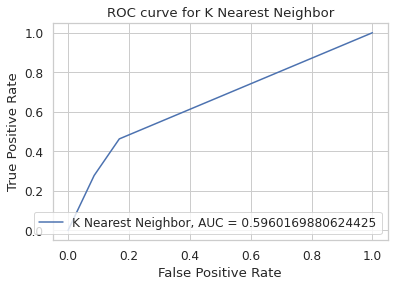

In [ ]:
fpr_knn, tpr_knn, _ = roc_curve(Y_test, Y_proba_test_knn[:,1])
plt.plot(fpr_knn, tpr_knn, label="K Nearest Neighbor, AUC = " + str(roc_auc_score(Y_test, Y_pred_test_knn)))
plt.legend(loc = 'lower right')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for K Nearest Neighbor')

### 8. Support Vector Classifier

In [ ]:
from sklearn import svm
model_svm = svm.SVC(kernel='linear', probability = True)

model_svm.fit(X_train,Y_train)

Y_pred_train_svm = model_svm.predict(X_train)
Y_pred_test_svm = model_svm.predict(X_test)
Y_proba_test_svm = model_svm.predict_proba(X_test)

###### Evaluating the Support Vector Classifier model

Train accuracy: 0.7965579244798356
Test accuracy: 0.776908023483366
Recall Score: 0.5555555555555556
ROC AUC Score: 0.7528696051423325

Classification Report:

              precision    recall  f1-score   support

           0       0.97      0.79      0.87       968
           1       0.13      0.56      0.21        54

    accuracy                           0.78      1022
   macro avg       0.55      0.67      0.54      1022
weighted avg       0.93      0.78      0.84      1022


Confusion Matrix:



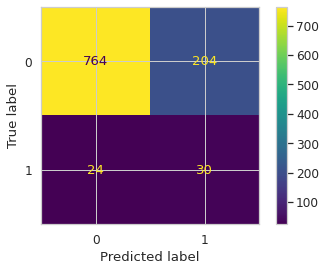

In [ ]:
print('Train accuracy: ' + str(accuracy_score(Y_train, Y_pred_train_svm)))
print('Test accuracy: ' + str(accuracy_score(Y_test, Y_pred_test_svm)))
print('Recall Score: ' + str(recall_score(Y_test, Y_pred_test_svm)))
print('ROC AUC Score: ' + str(roc_auc_score(Y_test, Y_proba_test_svm[:,1])))

print('\nClassification Report:\n')
print(classification_report(Y_test, Y_pred_test_svm))
print('\nConfusion Matrix:\n')
plot_confusion_matrix(model_svm, X_test, Y_test)

###### ROC curve for Support Vector Classifier model

Text(0.5, 1.0, 'ROC curve for Support Vector Machine')

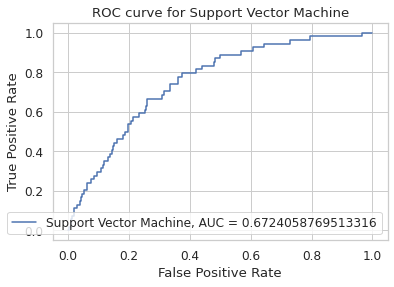

In [ ]:
fpr_svm, tpr_svm, _ = roc_curve(Y_test, Y_proba_test_svm[:,1])
plt.plot(fpr_svm, tpr_svm, label="Support Vector Machine, AUC = " + str(roc_auc_score(Y_test, Y_pred_test_svm)))
plt.legend(loc = 'lower right')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for Support Vector Machine')

## Comparing the Classification Machine Learning Algorithms

###### Comparing the train accuracies of different classification algorithms

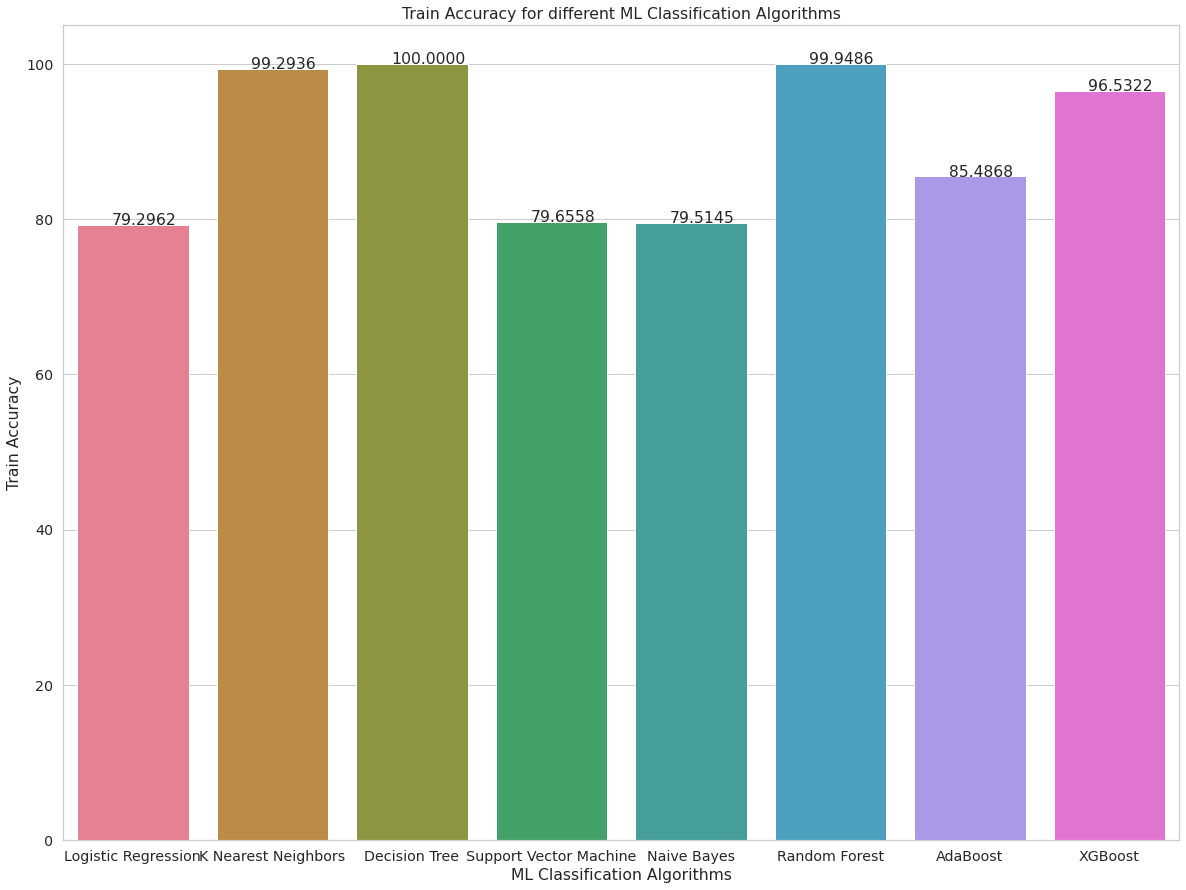

In [ ]:
list_of_algos = ['Logistic Regression', 'K Nearest Neighbors', 'Decision Tree', 'Support Vector Machine', 'Naive Bayes',
                 'Random Forest', 'AdaBoost', 'XGBoost']
train_accuracy_list = [accuracy_score(Y_train,Y_pred_train_logistic)*100, accuracy_score(Y_train,Y_pred_train_knn)*100,
               accuracy_score(Y_train,Y_pred_train_decision_tree)*100, accuracy_score(Y_train,Y_pred_train_svm)*100,
               accuracy_score(Y_train,Y_pred_train_naive_bayes)*100, accuracy_score(Y_train,Y_pred_train_random_forest)*100,
               accuracy_score(Y_train,Y_pred_train_adaboost)*100, accuracy_score(Y_train,Y_pred_train_xgboost)*100]

plt.figure(figsize = (20,15))
sns.set(font_scale = 1.3)
sns.set_style('whitegrid')
barplot_train = sns.barplot(list_of_algos, train_accuracy_list, palette = "husl")

barplot_train.set_xlabel('ML Classification Algorithms')
barplot_train.set_ylabel('Train Accuracy')
barplot_train.set_title('Train Accuracy for different ML Classification Algorithms')

for p in barplot_train.patches:
    barplot_train.annotate("{:.4f}".format(p.get_height()), (p.get_x() + 0.25, p.get_height() + 0.01))

###### Comparing the test accuracies of different classification algorithms

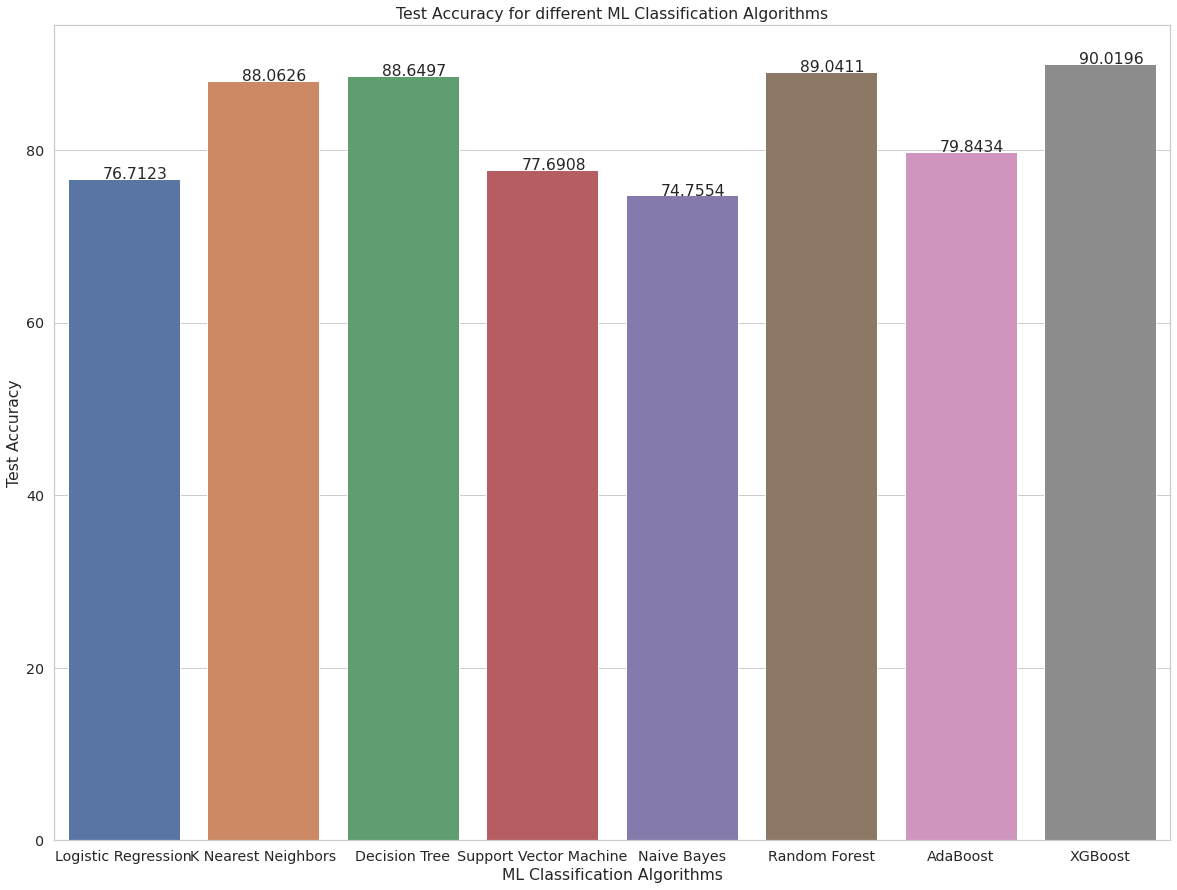

In [ ]:
test_accuracy_list = [accuracy_score(Y_test,Y_pred_test_logistic)*100, accuracy_score(Y_test,Y_pred_test_knn)*100,
               accuracy_score(Y_test,Y_pred_test_decision_tree)*100, accuracy_score(Y_test,Y_pred_test_svm)*100,
               accuracy_score(Y_test,Y_pred_test_naive_bayes)*100, accuracy_score(Y_test,Y_pred_test_random_forest)*100,
               accuracy_score(Y_test,Y_pred_test_adaboost)*100, accuracy_score(Y_test,Y_pred_test_xgboost)*100]

plt.figure(figsize = (20,15))
sns.set(font_scale = 1.3)
sns.set_style('whitegrid')
barplot_test = sns.barplot(list_of_algos,test_accuracy_list)

barplot_test.set_xlabel('ML Classification Algorithms')
barplot_test.set_ylabel('Test Accuracy')
barplot_test.set_title('Test Accuracy for different ML Classification Algorithms')

for p in barplot_test.patches:
    barplot_test.annotate("{:.4f}".format(p.get_height()), (p.get_x() + 0.25, p.get_height() + 0.01))

###### Plotting the ROC curves of different classification algorithms and comparing their ROC-AUC score

Text(0.5, 1.0, 'ROC curves for different ML Classification Algorithms')

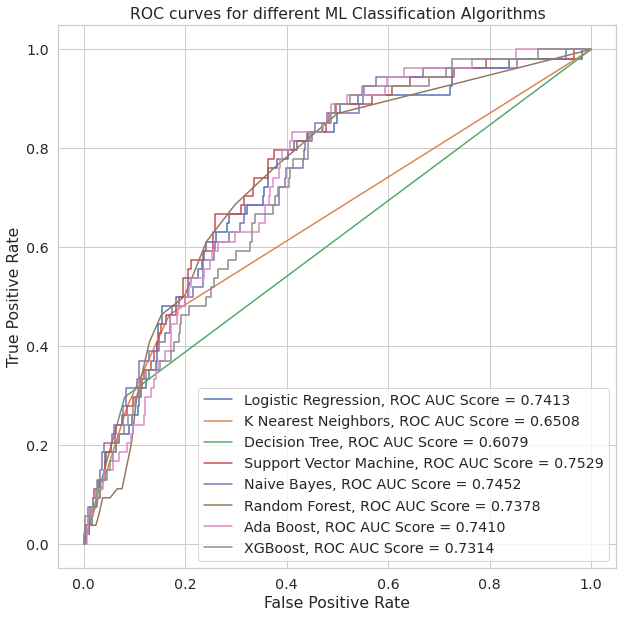

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(fpr_logistic, tpr_logistic, label="Logistic Regression, ROC AUC Score = %.4f" % (roc_auc_score(Y_test, Y_proba_test_logistic[:,1])))
plt.plot(fpr_knn, tpr_knn, label="K Nearest Neighbors, ROC AUC Score = %.4f" % (roc_auc_score(Y_test, Y_proba_test_knn[:,1])))
plt.plot(fpr_decision_tree, tpr_decision_tree, label="Decision Tree, ROC AUC Score = %.4f" % (roc_auc_score(Y_test, Y_proba_test_decision_tree[:,1])))
plt.plot(fpr_svm, tpr_svm, label="Support Vector Machine, ROC AUC Score = %.4f" % (roc_auc_score(Y_test, Y_proba_test_svm[:,1])))
plt.plot(fpr_naive_bayes, tpr_naive_bayes, label="Naive Bayes, ROC AUC Score = %.4f" % (roc_auc_score(Y_test, Y_proba_test_naive_bayes[:,1])))
plt.plot(fpr_random_forest, tpr_random_forest, label="Random Forest, ROC AUC Score = %.4f" % (roc_auc_score(Y_test, Y_proba_test_random_forest[:,1])))
plt.plot(fpr_adaboost, tpr_adaboost, label="Ada Boost, ROC AUC Score = %.4f" % (roc_auc_score(Y_test, Y_proba_test_adaboost[:,1])))
plt.plot(fpr_xgboost, tpr_xgboost, label="XGBoost, ROC AUC Score = %.4f" % (roc_auc_score(Y_test, Y_proba_test_xgboost[:,1])))
plt.legend(loc = 'lower right')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves for different ML Classification Algorithms')

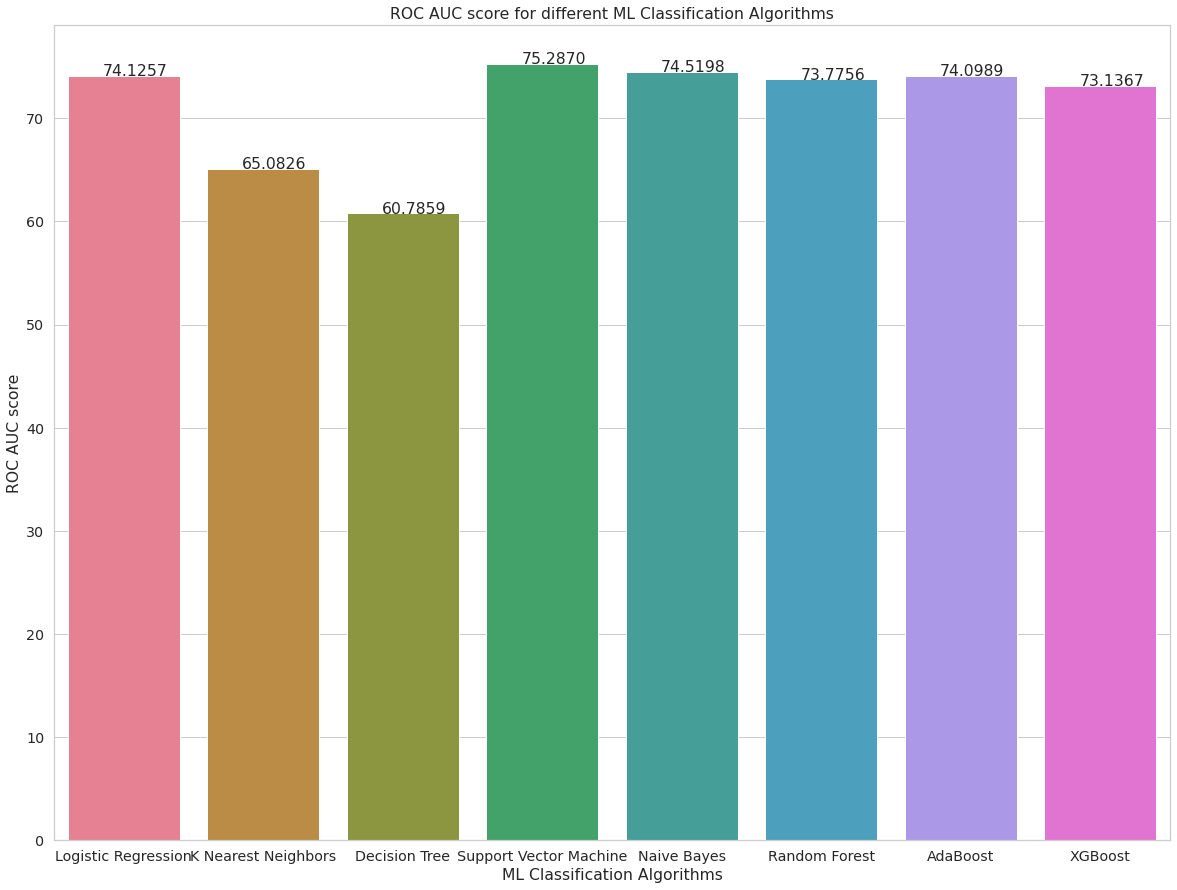

In [ ]:
Y_roc_auc_list = [roc_auc_score(Y_test, Y_proba_test_logistic[:,1])*100, roc_auc_score(Y_test, Y_proba_test_knn[:,1])*100,
               roc_auc_score(Y_test, Y_proba_test_decision_tree[:,1])*100, roc_auc_score(Y_test, Y_proba_test_svm[:,1])*100,
               roc_auc_score(Y_test, Y_proba_test_naive_bayes[:,1])*100, roc_auc_score(Y_test, Y_proba_test_random_forest[:,1])*100,
               roc_auc_score(Y_test, Y_proba_test_adaboost[:,1])*100, roc_auc_score(Y_test, Y_proba_test_xgboost[:,1])*100]

plt.figure(figsize = (20,15))
sns.set(font_scale = 1.3)
sns.set_style('whitegrid')
barplot_roc_auc = sns.barplot(list_of_algos, Y_roc_auc_list, palette = "husl")

barplot_roc_auc.set_xlabel('ML Classification Algorithms')
barplot_roc_auc.set_ylabel('ROC AUC score')
barplot_roc_auc.set_title('ROC AUC score for different ML Classification Algorithms')

for p in barplot_roc_auc.patches:
    barplot_roc_auc.annotate("{:.4f}".format(p.get_height()), (p.get_x() + 0.25, p.get_height() + 0.01))

Inference: XGBoost gives the maximum test accuracy of 92.7592% and a high ROC-AUC score of 75.8207